# Analisis Exploratorio Clientes de Tarjeta de Credito

* En el presente analisis se analizaran las caracteristicas de los clientes que estan cancelando sus tarjetas de credito en el banco 
* De igual manera se tendran algunas consideraciones y conclusiones a tener en cuenta respecto a la publicidad o estrategias que el banco decida tomar para evitar la desercion de sus productos bancarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clientes = clientes = pd.read_csv("clientes.csv")
clientes.head()

,NroCliente,EstadoCuenta,Edad,Genero,NroDependientes,NivelEducativo,EstadoCivil,IngresosAnual,TipoTarjeta,Antiguedad,NroProductosBanco,MesesInactivos_Ult_Año,Reclamos_Ult_año,CupoMax,Transacciones_Ult_año
0,768805383,1,45,1,3,4,2,4,1,39,5,1,3,12691.0,42
1,818770008,1,49,0,5,5,4,2,1,44,6,1,2,8256.0,33
2,713982108,1,51,1,3,5,2,5,1,36,4,1,0,3418.0,20
3,769911858,1,40,0,4,4,1,2,1,34,3,4,1,3313.0,20
4,709106358,1,40,1,3,2,2,4,1,21,5,1,0,4716.0,28


--------------------------------

## Seleccionando los clientes que cancelaron su Tarjeta de Credito y Analizando sus Caracteristicas

In [3]:
noClientes = clientes[clientes["EstadoCuenta"]==0]
from pathlib import Path  
filepath = Path('C:/Users/Arley/Desktop/Noclientes.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
clientes.to_csv(filepath, index=False)

# Genero de los Clientes

(array([0, 1], dtype=int64), array([930, 697], dtype=int64))


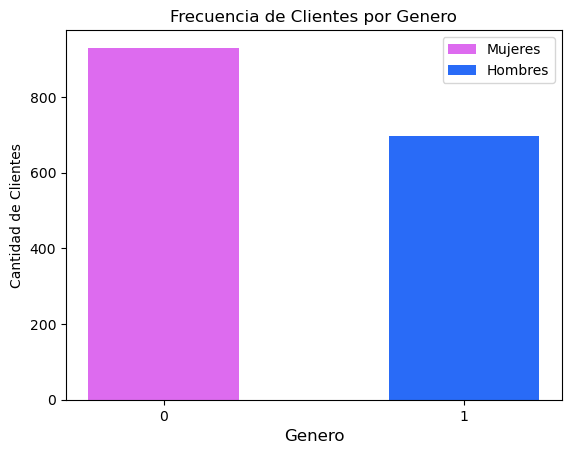

In [4]:
frecuencias = np.unique(noClientes["Genero"], return_counts=True)
plt.bar([0], frecuencias[1][0], color=["#DD6BEF"], width=0.5, label="Mujeres")
plt.bar([1], frecuencias[1][1], color=["#296BF7"], width=0.5, label="Hombres")
plt.xticks([0,1])

#Configuraciones de estilo
plt.title("Frecuencia de Clientes por Genero")
plt.xlabel("Genero", size=12)
plt.ylabel("Cantidad de Clientes")
plt.legend()
print(frecuencias)

### CONCLUSION
* Al parecer no hay una diferencia significativa entre los clientes del banco que dejaron su tarjeta de credito sin embargo, las mujeres tienen una mayor disposicion a abandonar el producto segun los datos presentes.

-----------------------------

## Genero vs Edad

Text(0.5, 1.0, 'Genero vs Edad')

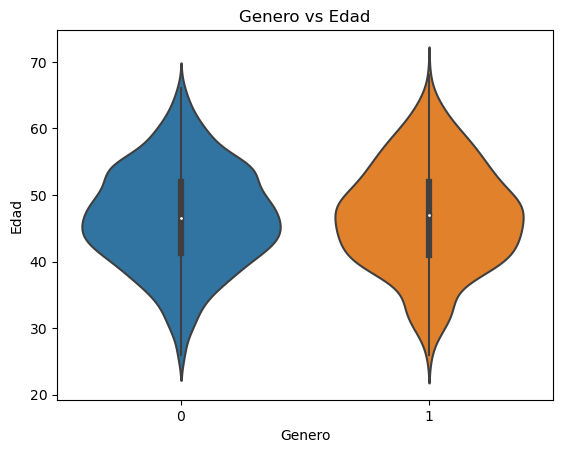

In [5]:
sns.violinplot(data=noClientes, x='Genero', y='Edad')
plt.title('Genero vs Edad')

### CONCLUSION
* La mayor parte de clientes que abandonan el producto se encuentran entre los 40 y 55 años aproximadamente. Adicionalmente se observa que el genero no tiene mayor influencia

------------------------------------

## Numero de Dependientes por Cliente

Text(0.5, 1.0, 'Frecuencia Dependientes del cliente')

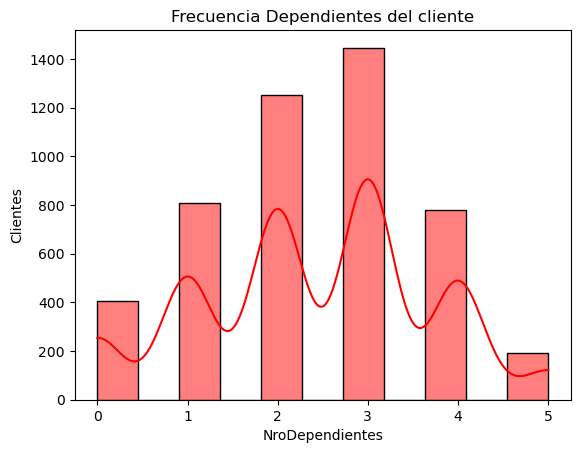

In [6]:
sns.histplot(data=noClientes, x="NroDependientes", weights=3, color="red", kde=True, palette='Pastel2', bins=11)
plt.ylabel("Clientes")
plt.title("Frecuencia Dependientes del cliente")

### CONCLUSION
* Hay una tendecia a abandonar la tarjeta de credito para clientes que tienen entre 2 o 4 dependientes.

---------------------------------

## Estado Civil de Clientes

Text(0.5, 1.0, 'Estado Civil de los Clientes')

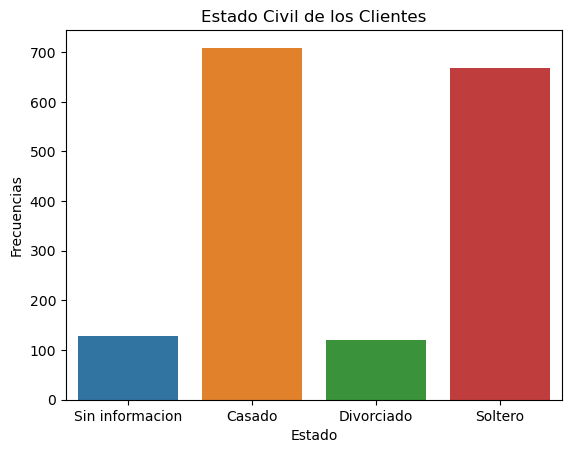

In [7]:
est_civil = pd.DataFrame({"Codigo":[1,2,3,4], "Estado":["Sin informacion","Casado","Divorciado","Soltero"]})

frecuencias_estados = np.unique(noClientes["EstadoCivil"], return_counts=True)
est_civil["Frecuencias"] = frecuencias_estados[1]

sns.barplot(data=est_civil, x='Estado', y='Frecuencias')
plt.title("Estado Civil de los Clientes")

### CONCLUSION
* La mayor parte de clientes que desisten del producto son personas casadas o solteras mientras que las personas divorsiadas y las que no tienen informacion tienen una tendencia muy baja a cancelar su tarjeta

--------------------------------

## Antiguedad de clientes vs Tipo de Tarjeta

Text(0.5, 1.0, 'Antiguedad de clientes vs Tipo de Tarjeta')

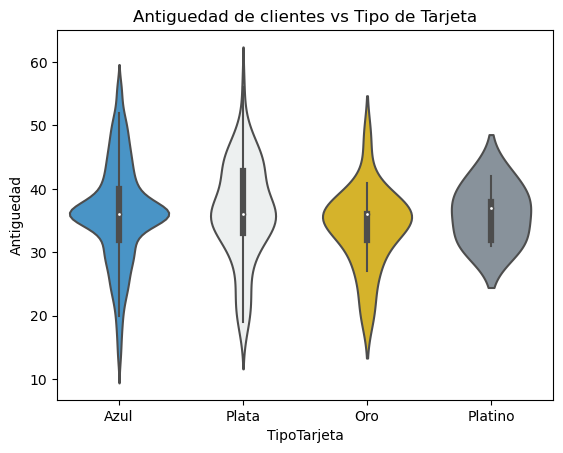

In [8]:
sns.violinplot(data=noClientes, y='Antiguedad', x='TipoTarjeta', palette=['#3498DB','#ECF0F1','#F1C40F','#85929E'])
plt.xticks([0,1,2,3],["Azul","Plata","Oro","Platino"])
plt.title("Antiguedad de clientes vs Tipo de Tarjeta")

## CONCLUSIONES
* Para las tarjetas Azul, plata y Oro tienen una mayor probabilidad de abandono cuando la antiguedad de los clientes oscila entre los 30 y 50 años de antiguedad.
* Por otro lado La tarjeta Platino tiene una edad de ocurrencia entre los 30 y 40 años aproximadamente

-------------------------------

## Reclamos vs Transacciones en el Ultimo Año

Text(0.5, 0, '')

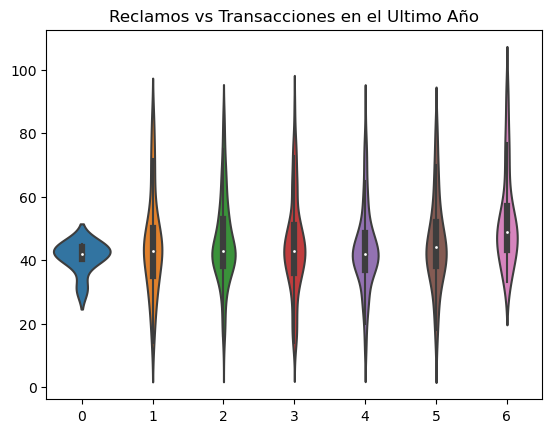

In [9]:
sns.violinplot(data=noClientes, y='Transacciones_Ult_año', x='Reclamos_Ult_año')
plt.title("Reclamos vs Transacciones en el Ultimo Año")
plt.ylabel(None)
plt.xlabel(None)

## CONCLUSIONES
* Los clientes Suelen abandonar su producto cuando efectuan entre 40 y 50 transacciones al año

--------------------------

## Tipo de Tarjeta Clientes que abandonan su Producto

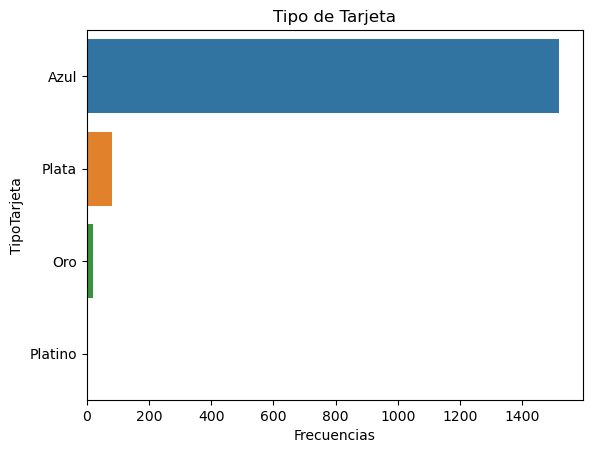

In [10]:
sns.countplot(y='TipoTarjeta', data=noClientes)
plt.title("Tipo de Tarjeta")
plt.xlabel("Frecuencias")
plt.yticks([0,1,2,3],["Azul","Plata","Oro","Platino"])
plt.show()

## CONCLUSIONES
* La tarjeta numero 1 correspondiente tarjetas azules son los productos con mayor abandono, probablemente por lo que los clientes no estan fidelizados con una tarjeta mas personalizada o porque lo ingresos de estos clientes son muy bajos

------------------

## Ingresos Anuales de los clientes

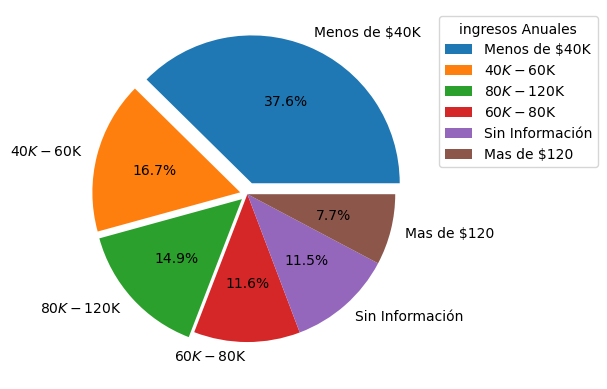

In [11]:
tipoTarjeta = noClientes['IngresosAnual'].value_counts()
plt.pie(tipoTarjeta, explode=(0.08,0.05,0.05,0,0,0),
       autopct="%1.1f%%",
       labels=["Menos de $40K", "$40K - $60K", "$80K - $120K", "$60K - $80K", "Sin Información","Mas de $120"])

plt.legend(["Menos de $40K", "$40K - $60K", "$80K - $120K", "$60K - $80K", "Sin Información","Mas de $120"]
           , title="ingresos Anuales", bbox_to_anchor=(1, 1.0), loc='upper left')
plt.show()

clientes["IngresosAnual"] = np.where(clientes["IngresosAnual"]=="$120K +",6,
                            np.where(clientes["IngresosAnual"]=="$80K - $120K",5,
                            np.where(clientes["IngresosAnual"]=="$60K - $80K",4,
                            np.where(clientes["IngresosAnual"]=="$40K - $60K",3,
                            np.where(clientes["IngresosAnual"]=="Less than $40K",2,
                            np.where(clientes["IngresosAnual"]=="Unknown",1,0))))))

## CONCLUSIONES
* Hay una tendencia clara sobre clientes que ganan menos de 40k a renunciar sobre los productos, por lo que se deben implementar estrategias para acaparar estos clientes

------

### TIPO DE EDUCACION

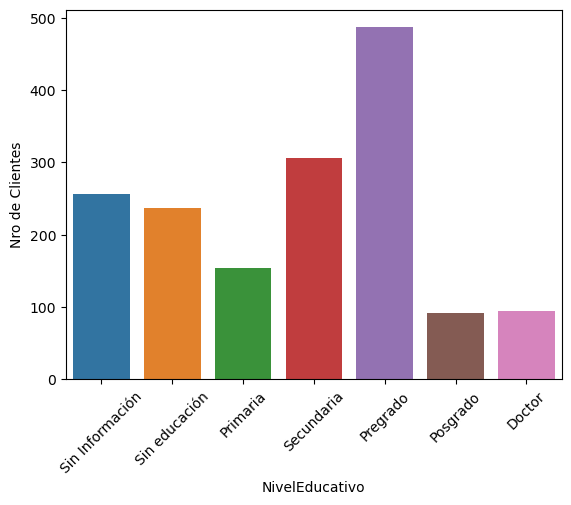

In [12]:

sns.countplot(x='NivelEducativo', data=noClientes)
plt.ylabel("Nro de Clientes")

plt.xticks(range(0,7),["Sin Información","Sin educación","Primaria","Secundaria", "Pregrado","Posgrado", "Doctor"], 
           rotation=45)

plt.show()

### CONCLUSIONES
* La mayor parte de clientes cuentan con un maximo de educacion hasta pregrado, teniendo como grupo minoritario a clientes con nivel de educacion de posgrado porlo que se deben considerar sus ingresos en las estrategias de fidelización.

-------------

### Número de Productos por Cliente

Text(0, 0.5, 'Clientes')

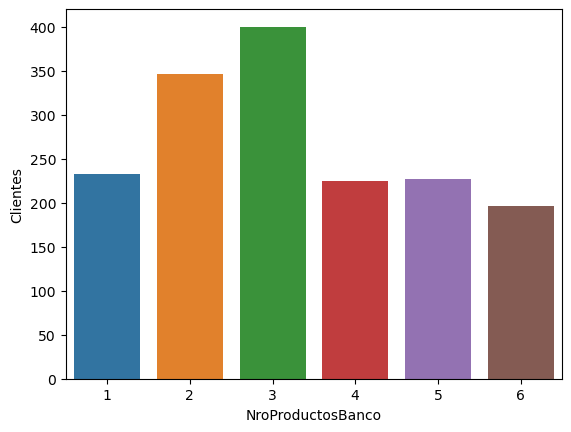

In [13]:
sns.countplot(x='NroProductosBanco', data=noClientes)
plt.ylabel("Clientes")

### CONCLUSIONES
* Los clientes con mas de 3 productos tienen una tendencia mas baja en abandonar la tarjeta de credito, probablemente porque estan mas fidelizados con la entidad bancaria. Las estrategias deben priorizar a las personas con menos de 3 productos.

---------------

### Genero vs Estado Civil

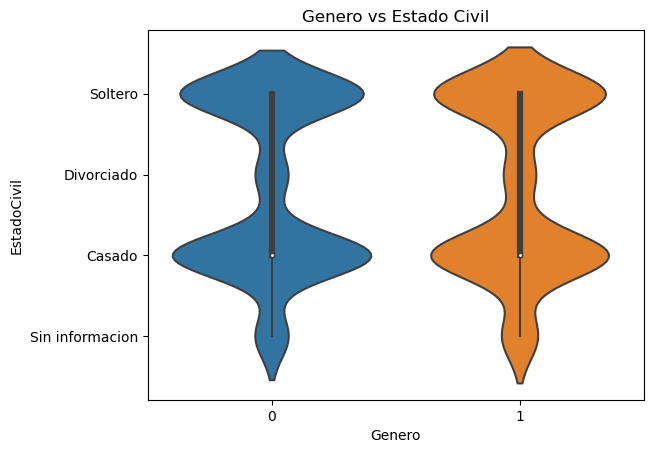

In [14]:
sns.violinplot(data=noClientes, y='EstadoCivil', x='Genero')
plt.title("Genero vs Estado Civil")
plt.yticks([1,2,3,4], ["Sin informacion", "Casado", "Divorciado", "Soltero"])
plt.show()

### CONCLUSIONES
* Los clientes con mayor deserción corresponden tanto para el sexo masculino como el femenino a personas casadas o solteras, posiblemente debido a que este tipo d eclientes tienen gastos fios mas amplios por una parte o gastos volatiles por otra parte.

---------------

### Edad vs Cupo Máximo

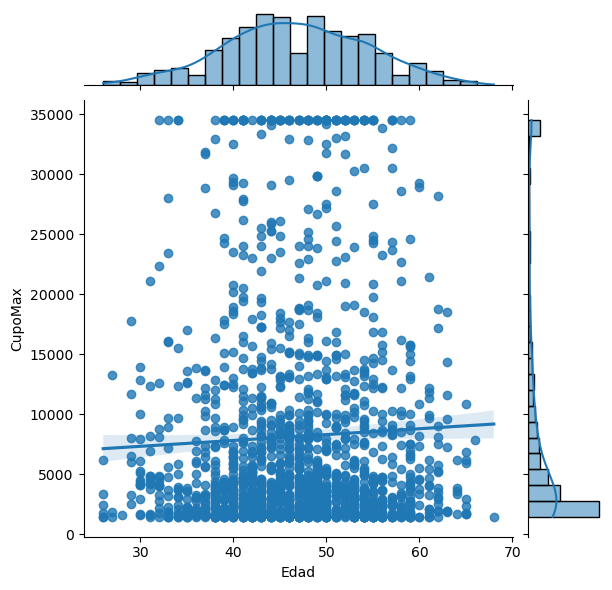

In [15]:
sns.jointplot(x='Edad',y='CupoMax',data=noClientes ,kind='reg')
plt.ylabel("Cupo Máximo")
plt.show()

### CONCLUSIONES
* Hay una densidad alta en personas con cupo máximo menor a los 8000 US con edades entre los 40 y 60 años, esto se complementa con graficos anteriores en los que se analiza que la mayoria de clientes que abandonan el producto son personas con gastos altos, ingresos bajos y productos basicos de la entidad financiera.